In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [47]:
raw_data = pd.read_csv('creditcard.csv') # Load the CSV file

In [48]:
raw_data.head()  # Display the first 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [49]:
# Split the data into training and test sets

In [50]:
X = raw_data.drop(columns=['Class']) #dropping class so we can train a model to predict this 
y = raw_data['Class'] #we dont drop class for y because this is our target variable, aka the label we want to predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #gonnna use 20% of the dataset for testing

## Create decision tree

In [51]:
from sklearn.tree import DecisionTreeClassifier #python library to create decision tree model

In [52]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42) #creating decision tree model. chosing a standard depth of 5 to start 

In [53]:
dt.fit(X_train, y_train) #train the model using the x and y training set 

DecisionTreeClassifier(max_depth=5, random_state=42)

## predict and view findings

In [54]:
from sklearn.metrics import classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt #library to visually plot results 

In [55]:
y_pred = dt.predict(X_test) #make predictions on test set

In [56]:
print(classification_report(y_test, y_pred)) #show classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.79      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



precision: 0 or 1 - measures the accuracy of positive predictions made by the model. for class 1 = fradulent transactions, .91  of the transactions were predicted to be fradulent. 0 class = 1.00, indicating that all non fradulent transactions predicted by the model were right. Recall shows how the model can correctly identify all instances of a class. for class = 1 i got .79, meaning the model correctly identified 79% of the fradulent transactions. for class 0 = 1.00, means the model correctly identified non fradulent transactions.For class 1 the F1-score is 0.84 which is the model's overall performance for detecting fraudulent transactions. Support is the number of actual occurrences of the class in the dataset. For class 1 there were 98 actual fraudulent transactions and for class 0 there were 56864 non fraudulent transactions. Accuracy is the ratio of correctly predicted instances to the total instances, and scored good on this. 

In [57]:
precision, recall, _ = precision_recall_curve(y_test, y_pred) #find percision and recall

In [58]:
#percision checks the accuracy of positive predictions and recall checks if ur model correctly identified all positive scenarios.

In [59]:
pr_auc = auc(recall, precision) #calculating the area

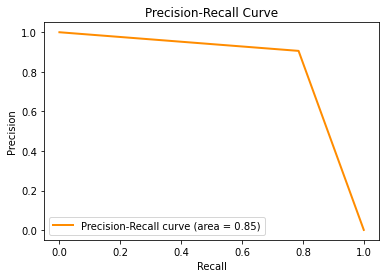

In [60]:
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show() #plot findings

this visual shows the percision and recall at different thresholds. The area is the summary of our findings to check the quality of the model.
The percision recall curve area = .85 means the model achieves good percision, as 1.00 would be perfect percision and 0 would be no percision. 

## Create the tree

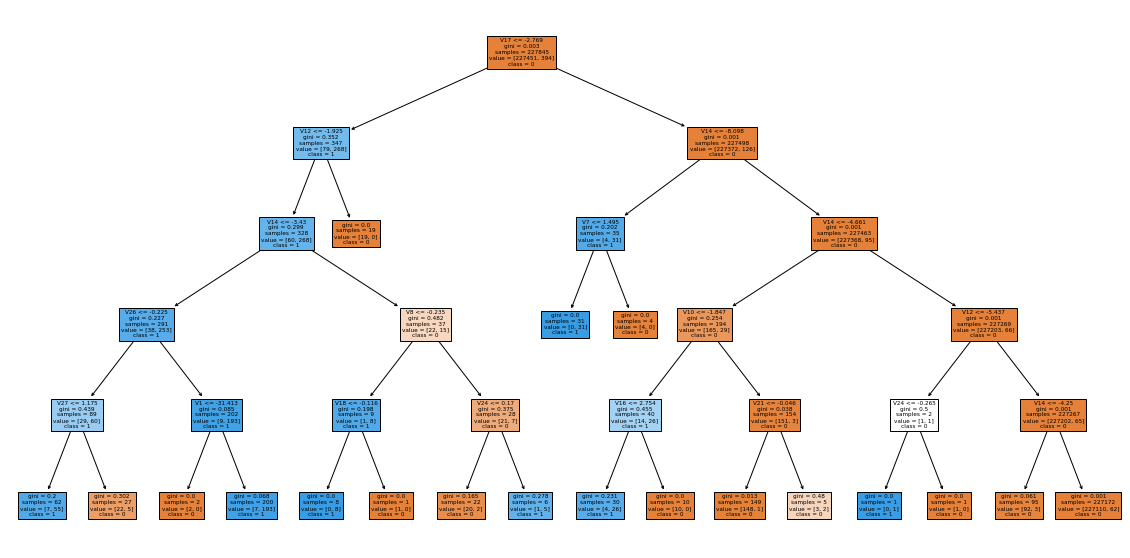

In [62]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  #image dim
plot_tree(dt_model, feature_names=X.columns, class_names=['0', '1'], filled=True) #show features,labels if a trans is frad or not, add color
plt.show() #display the model


A decision tree starts with a single node called the root, at the top. you can see at the top one node begins to determine the decisions, V12, then goes down to evaulate more nodes, like v14 for example.All of the infomration in the node is what determines the split, such as the sample size, value and class. In the first example, v12 also gets split to gini, which means it either belongs to v12, or gini, which would measure the impurity of the model. this helps determine the splits in the tree. The model continues to go down and scan the model. Whether a transaction is classified as legitimate or fraudulent, the decision tree visually shows this through the class label assigned at the leaf node, with a 0 or 1. as the tree grows, with each split based on a different feature and condition, this helps to lead us to the leaf nodes that provide predictions for the target variable